<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/lstm_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 40s 41ms/step - loss: 0.7099 - accuracy: 0.5858 - val_loss: 0.6769 - val_accuracy: 0.5764
Epoch 2/100
176/176 [==============================] - 7s 37ms/step - loss: 0.6550 - accuracy: 0.6018 - val_loss: 0.4621 - val_accuracy: 0.7940
Epoch 3/100
176/176 [==============================] - 6s 37ms/step - loss: 0.4914 - accuracy: 0.7727 - val_loss: 0.5807 - val_accuracy: 0.6908
Epoch 4/100
176/176 [==============================] - 6s 37ms/step - loss: 0.4286 - accuracy: 0.8094 - val_loss: 0.4443 - val_accuracy: 0.8128
Epoch 5/100
176/176 [==============================] - 6s 37ms/step - loss: 0.3365 - accuracy: 0.8596 - val_loss: 0.3323 - val_accuracy: 0.8592
Epoch 6/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2647 - accuracy: 0.8948 - val_loss: 0.3147 - val_accuracy: 0.8652
Epoch 7/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2290 - accuracy: 0.9128 - val_loss: 0.32

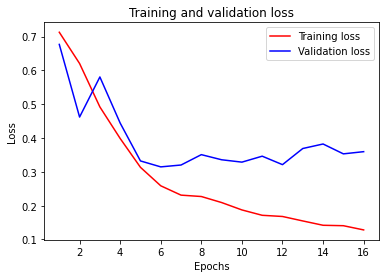

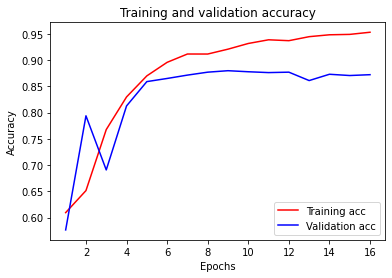

              precision    recall  f1-score   support

           0      0.872     0.866     0.869     12500
           1      0.867     0.873     0.870     12500

    accuracy                          0.869     25000
   macro avg      0.869     0.869     0.869     25000
weighted avg      0.869     0.869     0.869     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 8s 39ms/step - loss: 0.6694 - accuracy: 0.5889 - val_loss: 0.4116 - val_accuracy: 0.8216
Epoch 2/100
176/176 [==============================] - 6s 36ms/step - loss: 0.3476 - accuracy: 0.8551 - val_loss: 0.3311 - val_accuracy: 0.8668
Epoch 3/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2762 - accuracy: 0.8915 - val_loss: 0.3338 - val_accuracy: 0.8640
Epoch 4/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2318 - accuracy: 0.9127 - val_loss: 0.3101 - val_accuracy: 0.8660
Epoch 5/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2

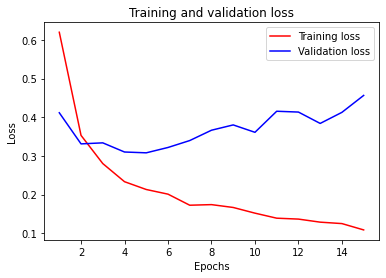

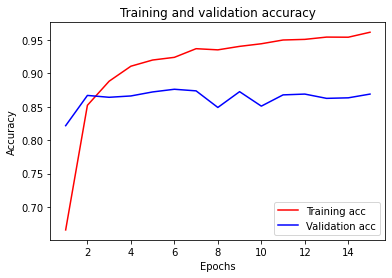

              precision    recall  f1-score   support

           0      0.867     0.895     0.880     12500
           1      0.891     0.862     0.877     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.878     25000
weighted avg      0.879     0.879     0.878     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 9s 40ms/step - loss: 0.6201 - accuracy: 0.6186 - val_loss: 0.3354 - val_accuracy: 0.8648
Epoch 2/100
176/176 [==============================] - 7s 37ms/step - loss: 0.3056 - accuracy: 0.8772 - val_loss: 0.3086 - val_accuracy: 0.8756
Epoch 3/100
176/176 [==============================] - 7s 37ms/step - loss: 0.2597 - accuracy: 0.9013 - val_loss: 0.3105 - val_accuracy: 0.8708
Epoch 4/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2265 - accuracy: 0.9150 - val_loss: 0.2803 - val_accuracy: 0.8852
Epoch 5/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2

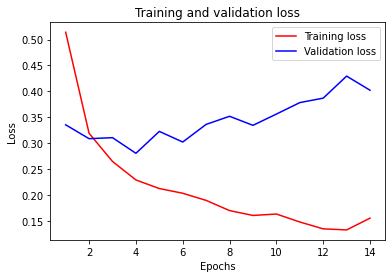

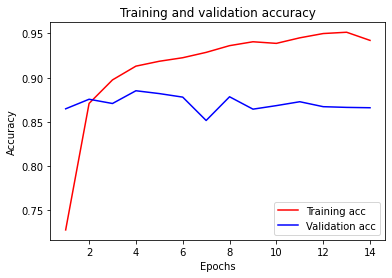

              precision    recall  f1-score   support

           0      0.865     0.890     0.877     12500
           1      0.887     0.861     0.874     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 8s 40ms/step - loss: 0.6632 - accuracy: 0.5891 - val_loss: 0.3834 - val_accuracy: 0.8456
Epoch 2/100
176/176 [==============================] - 7s 37ms/step - loss: 0.3444 - accuracy: 0.8575 - val_loss: 0.3238 - val_accuracy: 0.8676
Epoch 3/100
176/176 [==============================] - 7s 37ms/step - loss: 0.2525 - accuracy: 0.9051 - val_loss: 0.3143 - val_accuracy: 0.8748
Epoch 4/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2219 - accuracy: 0.9159 - val_loss: 0.3238 - val_accuracy: 0.8712
Epoch 5/100
176/176 [==============================] - 7s 37ms/step - loss: 0.1

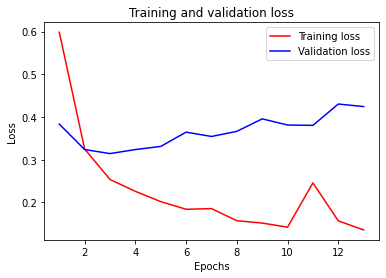

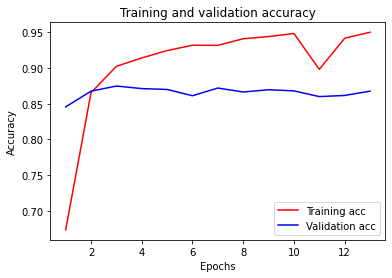

              precision    recall  f1-score   support

           0      0.864     0.894     0.879     12500
           1      0.890     0.859     0.874     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 9s 41ms/step - loss: 0.6252 - accuracy: 0.6133 - val_loss: 0.3419 - val_accuracy: 0.8476
Epoch 2/100
176/176 [==============================] - 7s 38ms/step - loss: 0.3264 - accuracy: 0.8707 - val_loss: 0.3460 - val_accuracy: 0.8500
Epoch 3/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2570 - accuracy: 0.8985 - val_loss: 0.3058 - val_accuracy: 0.8644
Epoch 4/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2302 - accuracy: 0.9141 - val_loss: 0.3169 - val_accuracy: 0.8616
Epoch 5/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2

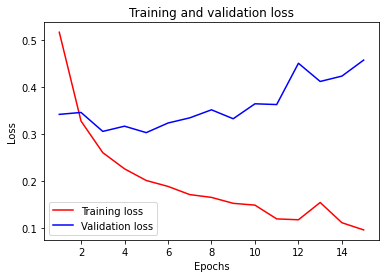

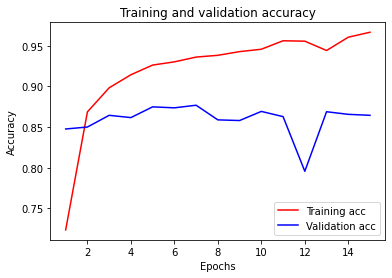

              precision    recall  f1-score   support

           0      0.890     0.863     0.876     12500
           1      0.867     0.893     0.880     12500

    accuracy                          0.878     25000
   macro avg      0.878     0.878     0.878     25000
weighted avg      0.878     0.878     0.878     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 9s 41ms/step - loss: 0.6425 - accuracy: 0.6150 - val_loss: 0.3622 - val_accuracy: 0.8420
Epoch 2/100
176/176 [==============================] - 7s 38ms/step - loss: 0.3202 - accuracy: 0.8633 - val_loss: 0.3210 - val_accuracy: 0.8616
Epoch 3/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2591 - accuracy: 0.8998 - val_loss: 0.3296 - val_accuracy: 0.8624
Epoch 4/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2133 - accuracy: 0.9164 - val_loss: 0.3614 - val_accuracy: 0.8528
Epoch 5/100
176/176 [==============================] - 7s 38ms/step - loss: 0.1

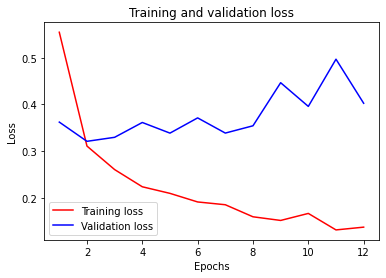

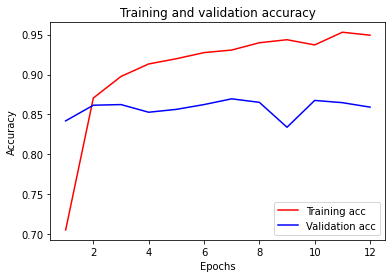

              precision    recall  f1-score   support

           0      0.906     0.814     0.858     12500
           1      0.831     0.916     0.871     12500

    accuracy                          0.865     25000
   macro avg      0.869     0.865     0.864     25000
weighted avg      0.869     0.865     0.864     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 8s 40ms/step - loss: 0.6798 - accuracy: 0.5744 - val_loss: 0.3912 - val_accuracy: 0.8296
Epoch 2/100
176/176 [==============================] - 7s 38ms/step - loss: 0.3662 - accuracy: 0.8496 - val_loss: 0.2927 - val_accuracy: 0.8800
Epoch 3/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2638 - accuracy: 0.8976 - val_loss: 0.2777 - val_accuracy: 0.8896
Epoch 4/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2167 - accuracy: 0.9174 - val_loss: 0.3156 - val_accuracy: 0.8920
Epoch 5/100
176/176 [==============================] - 7s 38ms/step - loss: 0.1

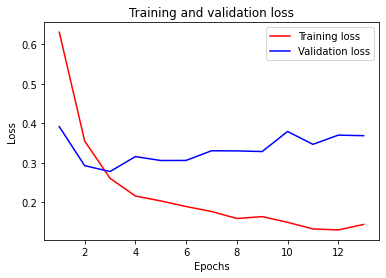

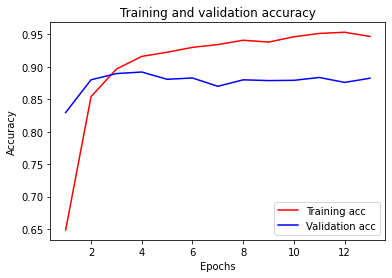

              precision    recall  f1-score   support

           0      0.887     0.874     0.880     12500
           1      0.876     0.888     0.882     12500

    accuracy                          0.881     25000
   macro avg      0.881     0.881     0.881     25000
weighted avg      0.881     0.881     0.881     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 9s 41ms/step - loss: 0.6033 - accuracy: 0.6339 - val_loss: 0.3134 - val_accuracy: 0.8736
Epoch 2/100
176/176 [==============================] - 7s 38ms/step - loss: 0.3177 - accuracy: 0.8726 - val_loss: 0.2869 - val_accuracy: 0.8848
Epoch 3/100
176/176 [==============================] - 7s 39ms/step - loss: 0.2602 - accuracy: 0.8986 - val_loss: 0.2867 - val_accuracy: 0.8840
Epoch 4/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2155 - accuracy: 0.9197 - val_loss: 0.2890 - val_accuracy: 0.8820
Epoch 5/100
176/176 [==============================] - 7s 39ms/step - loss: 0.1

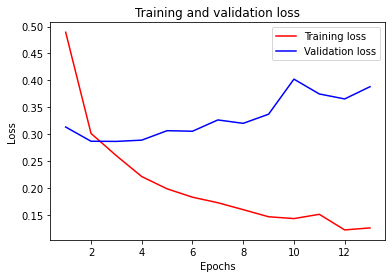

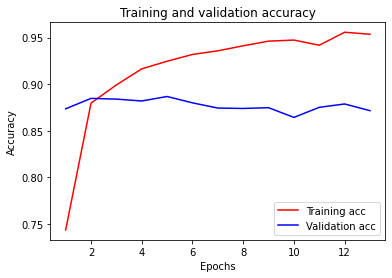

              precision    recall  f1-score   support

           0      0.879     0.878     0.878     12500
           1      0.878     0.879     0.878     12500

    accuracy                          0.878     25000
   macro avg      0.878     0.878     0.878     25000
weighted avg      0.878     0.878     0.878     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 9s 41ms/step - loss: 0.6534 - accuracy: 0.5989 - val_loss: 0.3869 - val_accuracy: 0.8328
Epoch 2/100
176/176 [==============================] - 7s 38ms/step - loss: 0.3181 - accuracy: 0.8696 - val_loss: 0.3385 - val_accuracy: 0.8624
Epoch 3/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2567 - accuracy: 0.8996 - val_loss: 0.3010 - val_accuracy: 0.8772
Epoch 4/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2202 - accuracy: 0.9146 - val_loss: 0.2789 - val_accuracy: 0.8800
Epoch 5/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2

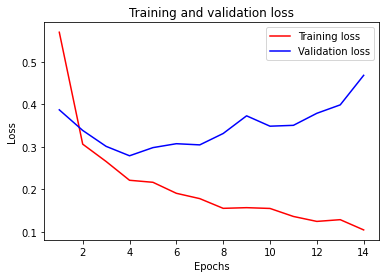

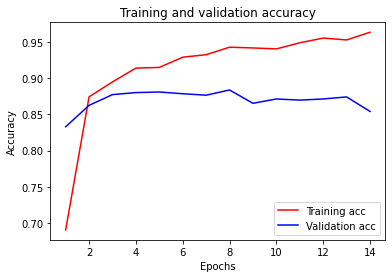

              precision    recall  f1-score   support

           0      0.864     0.898     0.881     12500
           1      0.894     0.858     0.876     12500

    accuracy                          0.878     25000
   macro avg      0.879     0.878     0.878     25000
weighted avg      0.879     0.878     0.878     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 9s 41ms/step - loss: 0.6582 - accuracy: 0.5775 - val_loss: 0.3343 - val_accuracy: 0.8584
Epoch 2/100
176/176 [==============================] - 7s 39ms/step - loss: 0.3027 - accuracy: 0.8799 - val_loss: 0.3232 - val_accuracy: 0.8644
Epoch 3/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2505 - accuracy: 0.9038 - val_loss: 0.2962 - val_accuracy: 0.8868
Epoch 4/100
176/176 [==============================] - 7s 38ms/step - loss: 0.2080 - accuracy: 0.9221 - val_loss: 0.3586 - val_accuracy: 0.8440
Epoch 5/100
176/176 [==============================] - 7s 38ms/step - loss: 0.

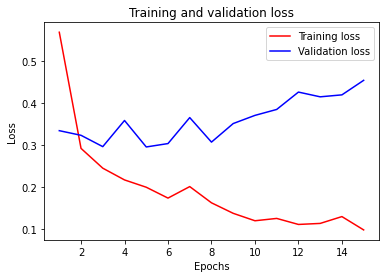

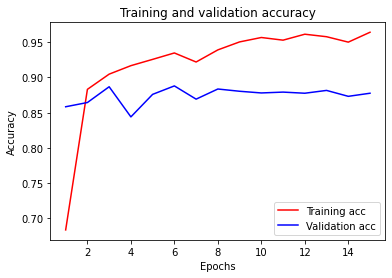

              precision    recall  f1-score   support

           0      0.860     0.880     0.870     12500
           1      0.877     0.857     0.867     12500

    accuracy                          0.869     25000
   macro avg      0.869     0.869     0.869     25000
weighted avg      0.869     0.869     0.869     25000


Average accuracy: 0.8749 (+/- 0.0051)
Average loss: 0.3030 (+/- 0.0096)
Average F1: 0.8749 (+/- 0.0044)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Dropout(rate=dropout_rate),
    LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True),
    Dropout(rate=dropout_rate),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
